In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# -----------------------------------------
# Create simple dataset: y = 2x + 1
# -----------------------------------------
x = np.linspace(-1, 1, 100)
y = 2 * x + 1

In [6]:
# -----------------------------------------
# Function to train with various batch sizes
# -----------------------------------------
def train_with_batch_size(batch_size, lr=0.1, epochs=50):
    w, b = 0.0, 0.0        # initial weights
    loss_history = []

    # training loop
    for epoch in range(epochs):
        indices = np.arange(len(x))
        np.random.shuffle(indices)   # shuffle each epoch
        
        for start in range(0, len(x), batch_size):
            end = start + batch_size
            batch_idx = indices[start:end]

            xb = x[batch_idx]
            yb = y[batch_idx]

            # prediction
            y_pred = w * xb + b

            # gradients
            dw = np.mean(2 * (y_pred - yb) * xb)
            db = np.mean(2 * (y_pred - yb))

            # update
            w -= lr * dw
            b -= lr * db

        # compute loss at end of epoch
        full_pred = w * x + b
        loss = np.mean((full_pred - y)**2)
        loss_history.append(loss)

    return loss_history


In [7]:
# -----------------------------------------
# Batch sizes to test
# -----------------------------------------
batch_sizes = [1, 5, 20, 100]
results = {}

for bs in batch_sizes:
    results[bs] = train_with_batch_size(bs)

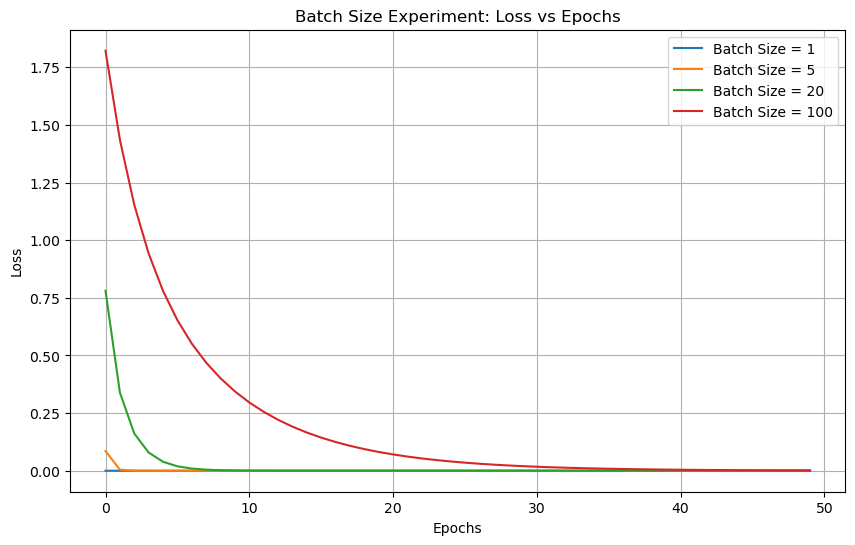

In [8]:
# -----------------------------------------
# Plot loss vs epochs
# -----------------------------------------
plt.figure(figsize=(10,6))

for bs in batch_sizes:
    plt.plot(results[bs], label=f"Batch Size = {bs}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Batch Size Experiment: Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

What  Will Observe
🟦 1. Blue Curve — Very Fast Convergence (Batch Size Smallest)
Loss drops almost immediately to near zero.
This means the model is learning very fast.
Small batches give frequent weight updates, so the learning responds quickly.
✔ Pros
Fastest learning
Best for quick convergence
✖ Cons
May be noisy
Sometimes unstable for harder problems
🟧 2. Orange Curve — Good Smooth Learning
Slightly slower than blue but still fast.
Very smooth curve, stable training.
✔ Pros
Good balance between speed and stability
Preferred in many real-world models
🟩 3. Green Curve — Slower but Stable Learning
Loss decreases steadily and smoothly.
This is typical behavior for medium batch sizes.
✔ Pros
Very stable
Good for deep models
✖ Cons
Slower than small batches
🟥 4. Red Curve — Very Slow Learning (Large Batch Size)
Loss starts high and reduces slowly over many epochs.
Large batch = fewer updates → slower learning.
✔ Pros
Smoothest curve
Very stable
✖ Cons
Slowest learning
Needs more epochs
Can get stuck in sharp minima
 Which One Is Best?
For most problems:
 Small or Medium Batch Size (Blue or Orange Curve)
Why?
Fast convergence
Good generalization
Smooth enough
More updates → better learning
Typical best values: Batch Size = 16, 32, 64
Large batch size (red curve) is NOT recommended unless you have:
Very large datasets
Powerful GPUs
Need extremely stable gradients